# TITANIC KAGGLE COMPETITION

#### S Sexton
#### May 5, 2020

## Table of Contents

* [0.5 Abstract](#abstract)
* [1. Project Goal](#project_goal)
* [2. Background Information](#background_info)
* [3. Acquire Data](#acquire)
* [4. Load Libraries](#libraries)
* [5. Set Working Directory](#directory)
* [6. Load Dataset](#dataset)
* [7. Cursory Explanation](#cursory)
* [8. Determine if Duplicates](#duplicate)
* [9. Explore Each Variable](#explore)
    * [9.1 Name Column](#name)
    * [9.2 Sex Column](#sex)
    * [9.3 Pclass Column](#pclass)
    * [9.4 Embarked Column](#embarked)
    * [9.5 Cabin Column](#cabin)
    * [9.6 Ticket Column](#ticket)
    * [9.7 Fare Column](#fare)
    * [9.8 Parch Column](#parch)
    * [9.9 SibSp Column](#sibsp)
    * [9.10 Age Column](#age)
* [10. Prepare Dataframes for Modeling](#prepare)
* [11. Modeling](#model)


# 0.5 Abstract <a class="anchor" id="abstract"></a>
Survival rate was better for:
- females vs males
- higher class vs lower class

# 1. Project Goal <a class="anchor" id="project_goal"></a>
Kaggle has already predefined the project goal as:
- Given a training set which lists passengers who survived or did not survive the Titanic disaster, create a model to determine who survived in the test dataset.

# 2. Background Information <a class="anchor" id="background_info"></a>
- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. This may be likely to the prevailing thoughts at the time to save women and children first.

# 3. Acquire Data <a class="anchor" id="acquire"></a>

- This is not necessary since it is supplied by the kaggle competition.

# 4. Load Libraries <a class="anchor" id="libraries">

In [2]:
# have to install any python packages that are missing but all necessary packages are installed

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 5. Set Working Directory <a class="anchor" id="directory"></a>

In [3]:
import os
os.getcwd()
os.chdir('C:\\Users\\sexto\\titaniccontest')
os.getcwd()

'C:\\Users\\sexto\\titaniccontest'

# 6. Load Dataset <a class="anchor" id="dataset"></a>

In [4]:
# Make code as reproducible as possible which includes where data was downloaded from.
# reading in data with the web link set to a variable is causing problems 

# Instead, manually downloaded titanic data from kaggle website into working directory
# Data downloaded from: https://www.kaggle.com/c/titanic/data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 7. Cursory Exploration <a class="anchor" id="cursory"></a>

Examine the size, contents, types of variables, missing variables, etc.

In [5]:
# training dataframe
# size 
sizeTrain = train_df.size
sizeTest = test_df.size
  
# shape 
shapeTrain = train_df.shape 
shapeTest = test_df.shape

# printing size and shape 
print("SizeTrain = {}\nShapeTrain = {}".
format(sizeTrain, shapeTrain))
print("SizeTest = {}\nShapeTest = {}".
format(sizeTest, shapeTest))

SizeTrain = 10692
ShapeTrain = (891, 12)
SizeTest = 4598
ShapeTest = (418, 11)


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

### Preliminary observations

#### From size
- train_df has the extra column "Survived"

#### From info
- INTEGERS: PassengerId, Survived, PClass, SibSp, Parch
- OBJECT: Name, Sex, Ticket, Cabin, Embarked
- FLOAT: Age, Fare

#### From describe
- min age is 0.42 which seems small but could indicate a baby
- max age is 80 which seems about right
- extremely high fare of 512 which could indicate more than one person on the ticket
- ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

2. Age is missing 891-714 = 177 variables.
3. Cabin seems to have a lot of nan values.

#### Variable Type
- Look at the given description of the column names (OR search the web to determine what the variable means) to determine if the type of variable is appropriate or should be changed.
- Type of variables are: integer, factor, object, float64
    
- Survived is either 0 or 1 so should set as category
- Pclass is either 1 or 2 or 3 so should set as category
- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names
- Ticket is a mix of numeric and alphanumeric data types
- Cabin is alphanumeric    

# 8. Determine if Duplicates <a class="anchor" id="duplicate"></a>
- Combine entire dataset to determine if duplicates in entire dataset (test & train) that need to be removed.
- Choose a variable that is unique.
- Best variable to use is Name

In [11]:
# Combine train and test dataset by adding Survived column to test dataset and with NaN
# Combine them so can clean data and feature engineer
combined_df =  pd.concat(objs=[train_df, test_df], axis=0, sort=False).reset_index(drop=True)
combined_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
# Determine how many values are missing
# Do NOT want to use a variable that has a lot of missing values
null_Name = train_df["Name"].isnull().sum()
print("Missing values for Name are:", null_Name)

Missing values for Name are: 0


In [13]:
# Select all duplicate rows based on one column
# List first and all instance of duplicate names
duplicateRowsName1 = combined_df[combined_df.duplicated(['Name'], keep='last')]
duplicateRowsName2 = combined_df[combined_df.duplicated(['Name'])]
duplicateRowsName3 = pd.concat([duplicateRowsName1, duplicateRowsName2])
sortName = duplicateRowsName3.sort_values(by=['Name'])
sortName

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


Upon examining the duplicate names, it appears that both are actually unique people since they have different ages and ticket numbers. These duplicate names will NOT be removed.

##### Secondary Confirmation
It may be a good idea to choose another column to confirm there are no duplicates. This is because a Name may appear unique but it really isn't because the Name is slightly mispelled eg. Anne instead of Ann

Choose Ticket number instead or Fare. However, determine how many values are missing.

In [16]:
# Determine how many values are missing
# Do NOT want to use a variable that has a lot of missing values
null_Ticket = train_df["Ticket"].isnull().sum()
print("Missing values for Ticket are:", null_Ticket)

Missing values for Ticket are: 0


In [18]:
duplicateTicket = combined_df[combined_df.duplicated(['Ticket'])]
sortTicket = duplicateTicket.sort_values(by=['Ticket'])
sortTicket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S
558,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S
585,586,1.0,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.650,E68,S
475,476,0.0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.000,A14,S
...,...,...,...,...,...,...,...,...,...,...,...,...
436,437,0.0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S
1058,1059,NaN,3,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.375,NaN,S
736,737,0.0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S
905,906,NaN,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.175,E31,S


Too many duplicate Ticket values to use as a reliable measure of duplicates.

Test fare for duplicates

In [20]:
# Determine how many values are missing
# Do NOT want to use a variable that has a lot of missing values
null_Ticket = train_df["Fare"].isnull().sum()
print("Missing values for Fare are:", null_Ticket)

Missing values for Fare are: 0


In [19]:
duplicateFare = combined_df[combined_df.duplicated(['Fare'])]
sortFare = duplicateFare.sort_values(by=['Fare'])
sortFare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
674,675,0.0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
806,807,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Too many duplicate Fare values to use as a reliable measure of duplicates.

# 9. Explore each variable <a class="anchor" id="explore"></a>

Only the training dataset will be explored. Any variables which show promise for modeling in the training dataset and have been modified will be then be modified in the test dataset. 

### Explore each column by:

##### First, clean up the variable, look at:
1. Are there missing values? Fill in with proxy, etc.
2. Is there an adequate number of that variable to properly represent the sample?
3. Are there outliers that should be dropped or addressed?
4. Are there inappropriate values for that variable?
5. Is the data type appropriate? convert if necessary
6. Can the variable be feature engineered?
7. Look for outliers.

##### Second, visualize the variable with charts and tables.

### 9.1 Name Column <a class="anchor" id="name"></a>

- The data dictionary in kaggle doesn't specify what name is. However, it seems to be the name of the passenger.

In [13]:
# Are there any null values?
all = len(train_df["Name"])
print ("Total variables for Name are:", all)
null_Name = train_df["Name"].isnull().sum()
print("Missing values for Name are:", null_Name)

Total variables for Name are: 891
Missing values for Name are: 0


In [14]:
a = min(train_df["Name"]), max(train_df["Name"])
print('Min and Max values are:', a)

b = train_df.Name.dtype
print('Data type is:', b)

c= train_df.Name.nunique()
print('Number of unique values is:', c)

# comment out since too many unique
#d= train_df.Name.unique()
#print('Unique values are:', d)
# if too many unique then print first 5 in dataframe instead
e= train_df.filter(like='Name').head(n=5)
print(e)

Min and Max values are: ('Abbing, Mr. Anthony', 'van Melkebeke, Mr. Philemon')
Data type is: object
Number of unique values is: 891
                                                Name
0                            Braund, Mr. Owen Harris
1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2                             Heikkinen, Miss. Laina
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                           Allen, Mr. William Henry


##### Extract title from the Name column

In [15]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in train_df["Name"]]
train_df["Title"] = pd.Series(dataset_title)
train_df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

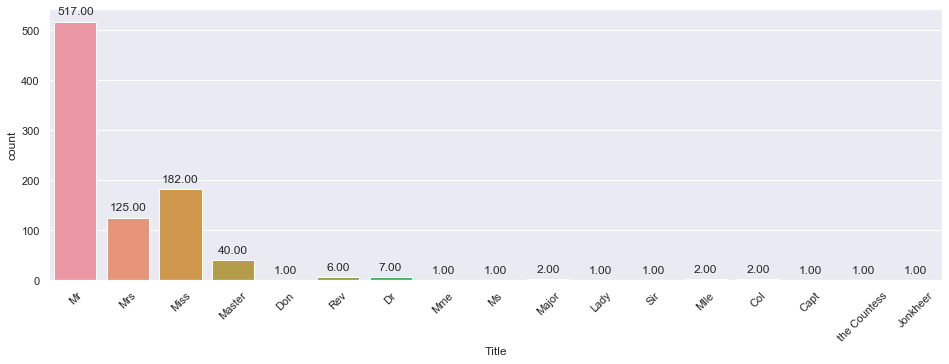

In [16]:
# Count how many of each title there are
sns.set(rc={'figure.figsize':(16,5)})
g = sns.countplot(x="Title",data=train_df)
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = plt.setp(g.get_xticklabels(), rotation=45)

In [17]:
# Convert to categorical values Title 
train_df["Title"] = train_df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df["Title"] = train_df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":2, "Mlle":2, "Mrs":2, "Mr":3, "Rare":4})
train_df["Title"] = train_df["Title"].astype(int)

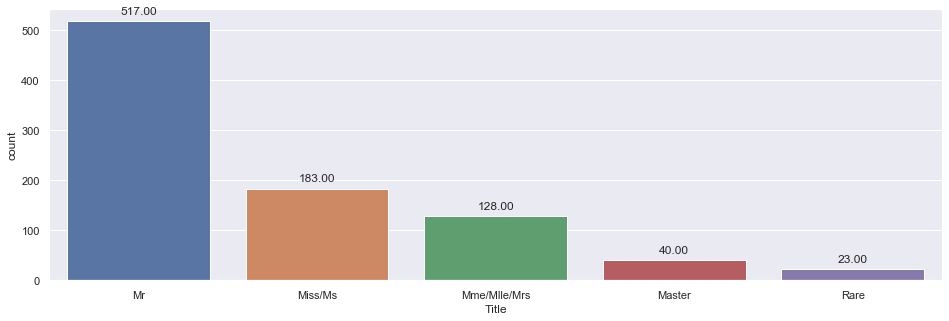

In [18]:
ax = sns.countplot(train_df["Title"], 
                   order = train_df["Title"].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax = ax.set_xticklabels(["Mr","Miss/Ms", "Mme/Mlle/Mrs","Master","Rare"])

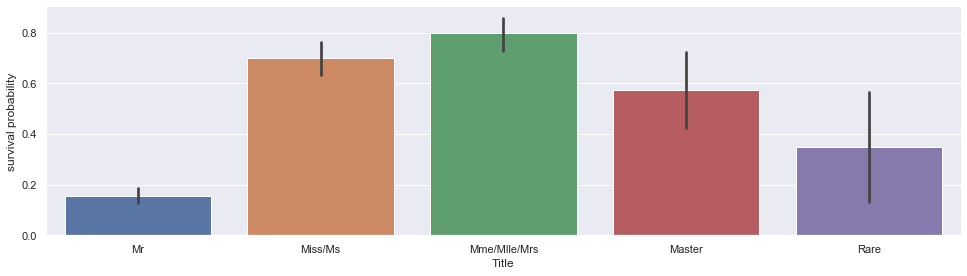

In [20]:
x = sns.catplot(x="Title",y="Survived",data=train_df,kind="bar", height=4, aspect=3.4, order = train_df["Title"].value_counts().index)
x = x.set_xticklabels(["Mr","Miss/Ms", "Mme/Mlle/Mrs","Master","Rare"])
x = x.set_ylabels("survival probability")

Note: The Rare group consists of only 23 samples AND it consists of mixed age ranges and sex. Thus, it would be best to group the Rare values into 1 of the 4 main categories.

##### Survival probability by title with the Rare category being grouped into one of the 4 main categories.

Upon researching what each title means, group the following.

Group the following into Mr - 
- Don - Don, and dom, is derived from the Latin Dominus: a master of a household who were male
- Rev - Reverend is an honorific style most often placed before the names of Christian clergy and ministers who were male
- Dr - Contracted "Dr" or "Dr.", it is used as a designation for a person who has obtained a doctorate who were typically male in the early 20th century
- Major - An army officer of high rank, in particular (in the US Army, Air Force, and Marine Corps) an officer ranking above captain and below lieutenant colonel. They were typically male in the early 20th century.
- Sir - A formal English honorific address for men.
- Col - Colonel (abbreviated Col., Col or COL and alternatively spelled coronel) is a senior military officer rank below the general officer ranks. They were typically male in the early 20th century.
- Capt - Captain is a military rank in armies, navies, coast guards, etc. They were typically male in the early 20th century.
- Jonkheer - an honorific in the Low Countries denoting the lowest rank within the nobility. Unsure if male or female typically.

Group the following into Mrs -
- Lady - a woman of superior social position, especially one of noble birth
- Countess/ the Countess - the wife or widow of a count or earl

In [21]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in train_df["Name"]]
train_df["Title2"] = pd.Series(dataset_title)

In [22]:
mr_df = train_df[train_df['Title2'].isin(['Don','Rev', 'Dr', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer'])]
sortName2 = mr_df.sort_values(by=['Title2'])
sortName2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,4,Capt
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S,4,Col
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,4,Col
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,4,Don
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,4,Dr
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,4,Dr
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,4,Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,4,Dr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,4,Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,4,Dr


Upon examining the ages and sex for the titles grouped in the Mr category, there is only 1 anamoly and that is the female doctor. Thus, because the sample (albeit small) supported the definitions found, I will keep those titles grouped into the Mr category.

In [23]:
mrs_df = train_df[train_df['Title2'].isin(['Lady', 'the Countess'])]
sortName2 = mrs_df.sort_values(by=['Title2'])
sortName2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6,A16,C,4,Lady
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,4,the Countess


Upon examining the ages and sex for the titles grouped in the Mrs category, the sample (albeit small) supported the definitions found, I will keep those titles grouped into the Mrs category.

In [24]:
# Convert to categorical values Title 
train_df["Title2"] = train_df["Title2"].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Mr')
train_df["Title2"] = train_df["Title2"].replace(['Lady', 'the Countess','Countess'], 'Mrs')
train_df["Title2"] = train_df["Title2"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":2, "Mlle":2, "Mrs":2, "Mr":3})
train_df["Title2"] = train_df["Title2"].astype(int)

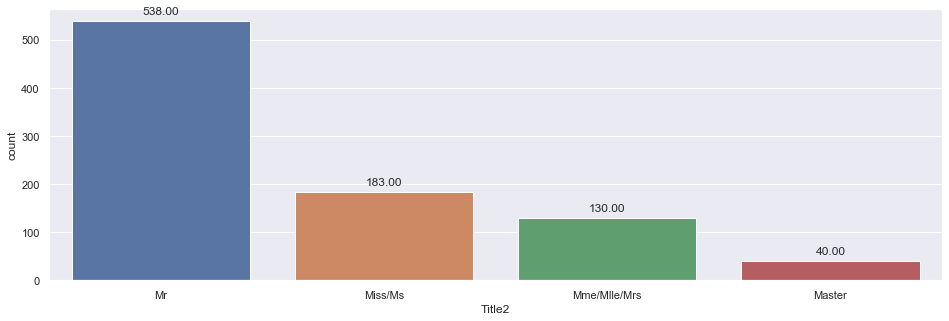

In [25]:
ax = sns.countplot(train_df["Title2"], 
                   order = train_df["Title2"].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax = ax.set_xticklabels(["Mr","Miss/Ms", "Mme/Mlle/Mrs","Master"])

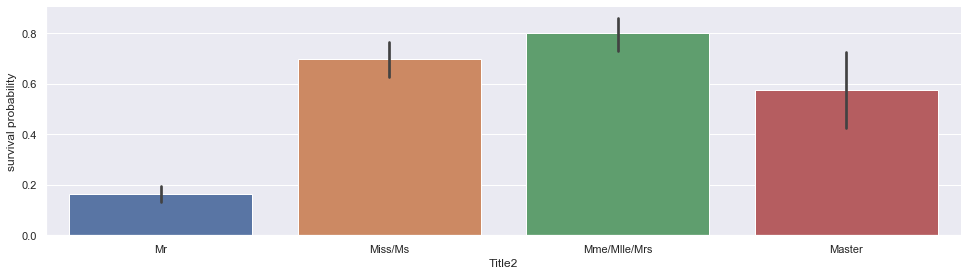

In [26]:
g = sns.catplot(x="Title2",y="Survived",data=train_df,kind="bar", order = train_df["Title2"].value_counts().index, height=4, aspect=3.4)
g = g.set_xticklabels(["Mr","Miss/Ms", "Mme/Mlle/Mrs","Master"])
g = g.set_ylabels("survival probability")

##### Observations
- Significantly more Miss/Ms survived than Mr. More Master survived than Mr.
- Title is possibly a good variable for modeling

### 9.2 Sex Column <a class="anchor" id="sex"></a>
- The data dictionary in kaggle says the sex column is sex.
- Typically, the protocol aboard ships was to save women and children first. Does this seem to hold true?

In [27]:
# Are there any missing values for Survived and Sex columns?
# Are there any null values?
all = len(train_df["Sex"])
print ("Total variables for Sex are:", all)
null_Survived = train_df["Survived"].isnull().sum()
print("Missing values for Survived are:", null_Survived)
null_Sex = train_df["Sex"].isnull().sum()
print("Missing values for Sex are:", null_Sex)

Total variables for Sex are: 891
Missing values for Survived are: 0
Missing values for Sex are: 0


In [28]:
a = min(train_df["Sex"]), max(train_df["Sex"])
print('Min and Max values are:', a)

b = train_df.Sex.dtype
print('Data type is:', b)

c= train_df.Sex.nunique()
print('Number of unique values is:', c)

d= train_df.Sex.unique()
print('Unique values are:', d)

Min and Max values are: ('female', 'male')
Data type is: object
Number of unique values is: 2
Unique values are: ['male' 'female']


- Sex does not have any outliers.
- Sex does not have any inappropriates values. The column is made up of either male or female.
- Sex is an object data type which is appropriate.

In [29]:
print("Ensure there are an adequate number of males and females who survived & didn't survive.")
# PassengerId was used because it has no missing values 
sextest1 = train_df[['Sex', 'Survived', 'PassengerId']].groupby(['Sex', 'Survived'], as_index=False).count()
print(sextest1)
print('The lowest number is 81 which is adequate for comparison.')

Ensure there are an adequate number of males and females who survived & didn't survive.
      Sex  Survived  PassengerId
0  female         0           81
1  female         1          233
2    male         0          468
3    male         1          109
The lowest number is 81 which is adequate for comparison.


Probability for Survival for males and females:
      Sex  Survived
0  female  0.742038
1    male  0.188908


Text(0, 0.5, 'survival probabilty')

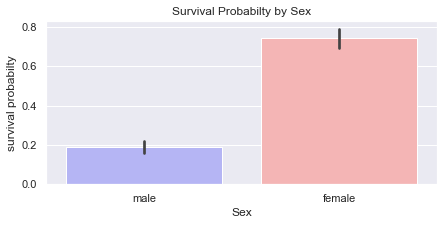

In [30]:
print('Probability for Survival for males and females:')
sextest = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(sextest)

sns.set(rc={'figure.figsize':(7,3)})
g = sns.barplot(x="Sex",y="Survived",data=train_df, palette="bwr").set_title("Survival Probabilty by Sex")
plt.ylabel("survival probabilty")

##### Observation
- Significantly more females than males survived
- Sex seems like an important variable for modeling

### 9.3 Pclass Column <a class="anchor" id="pclass"></a>
- The data dictionary in kaggle says the pclass is ticket class with 1 = 1st, 2 = 2nd, 3 = 3rd
- Pclass is ticket class and typically rich people will buy a higher class ticket than poor people
- Pclass 1 the is highest & most expensive class with Pclass 3 being the lowest & cheapest class

In [31]:
# Are there any null values?
all = len(train_df["Pclass"])
print ("Total variables for Pclass are:", all)

null_Pclass = train_df["Pclass"].isnull().sum()
print("Missing values for Pclass are:", null_Pclass)

Total variables for Pclass are: 891
Missing values for Pclass are: 0


In [32]:
a = min(train_df["Pclass"]), max(train_df["Pclass"])
print('Min and Max values are:', a)

b = train_df.Pclass.dtype
print('Data type is:', b)

c= train_df.Pclass.nunique()
print('Number of unique values is:', c)

d= train_df.Pclass.unique()
print('Unique values are:', d)

Min and Max values are: (1, 3)
Data type is: int64
Number of unique values is: 3
Unique values are: [3 1 2]


- Pclass does not have any outliers.
- Pclass does not have any inappropriates values. The column is made up of either 1,2,3 Pclass.
- Pclass is an int64 data type which is appropriate.

In [33]:
print("Ensure there are an adequate number of values for Survived in each Pclass to allow for reliable comparison.")
# PassengerId was used because it has no missing values 
Pclasstest2 = train_df[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived'], as_index=False).count()
print(Pclasstest2)
print('The lowest number is 80 which is adequate for comparison.')

Ensure there are an adequate number of values for Survived in each Pclass to allow for reliable comparison.
   Pclass  Survived  PassengerId
0       1         0           80
1       1         1          136
2       2         0           97
3       2         1           87
4       3         0          372
5       3         1          119
The lowest number is 80 which is adequate for comparison.


Probability for Survival in each class (with 1 being 1st class) is as follows:
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


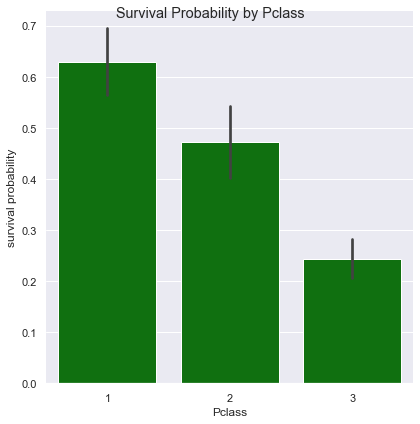

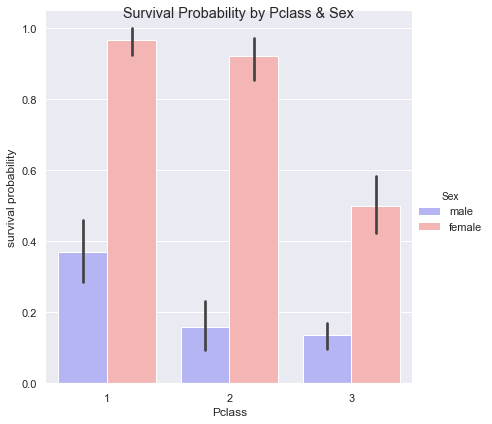

In [34]:
print('Probability for Survival in each class (with 1 being 1st class) is as follows:')
Pclasstest = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(Pclasstest)

# Explore Pclass vs Survived
g = sns.catplot(x="Pclass",y="Survived",data=train_df,kind="bar", height = 6 , 
color = "green")
g.despine(left=True)
g = g.set_ylabels("survival probability")
g = g.fig.suptitle("Survival Probability by Pclass")

# Explore Pclass vs Survived by Sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
                   height=6, kind="bar", palette="bwr")
g.despine(left=True)
g = g.set_ylabels("survival probability")
g = g.fig.suptitle("Survival Probability by Pclass & Sex")

##### Observation
- 1st class survival rate is better than 2nd class and 2nd class is better than 3rd class
- Females overall have a much better chance of surviving
- 1st class males and females have a better chance of surviving than lower class
- Pclass seems to be a good variable for modeling

### 9.4 Embarked Column <a class="anchor" id="embarked"></a>

- The data dictionary in kaggle says the Embarked column represents port of embarkation:C = Cherbourg, Q = Queenstown, S = Southampton

In [22]:
# Are there any null values?
all = len(train_df["Embarked"])
print ("Total variables for Embarked are:", all)
null_Embarked = train_df["Embarked"].isnull().sum()
print("Missing values for Embarked are:", null_Embarked)

Total variables for Embarked are: 891
Missing values for Embarked are: 2


In [23]:
# string so cant display
#a = min(train_df["Embarked"]), max(train_df["Embarked"])
#print('Min and Max values are:', a)

b = train_df.Embarked.dtype
print('Data type is:', b)

c= train_df.Embarked.nunique()
print('Number of unique values is:', c)

d= train_df.Embarked.unique()
print('Unique values are:', d)

Data type is: object
Number of unique values is: 3
Unique values are: ['S' 'C' 'Q' nan]


In [24]:
train_df[['Embarked', 'PassengerId']].groupby(['Embarked'], as_index=False).count()

,Embarked,PassengerId
0,C,168
1,Q,77
2,S,644


In [25]:
# Fill Embarked nan values with 'S' most frequent value since only 2 values or 0.2%
train_df["Embarked"] = train_df["Embarked"].fillna("S")

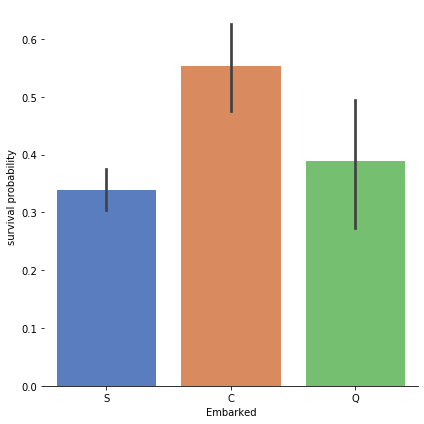

In [26]:
g = sns.catplot(x="Embarked", y="Survived",  data=train_df,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [27]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


Text(0.5, 0.98, 'SURVIVAL COUNT OF OF EACH PCLASS IN EACH EMBARKED S=0, C=1, Q=2')

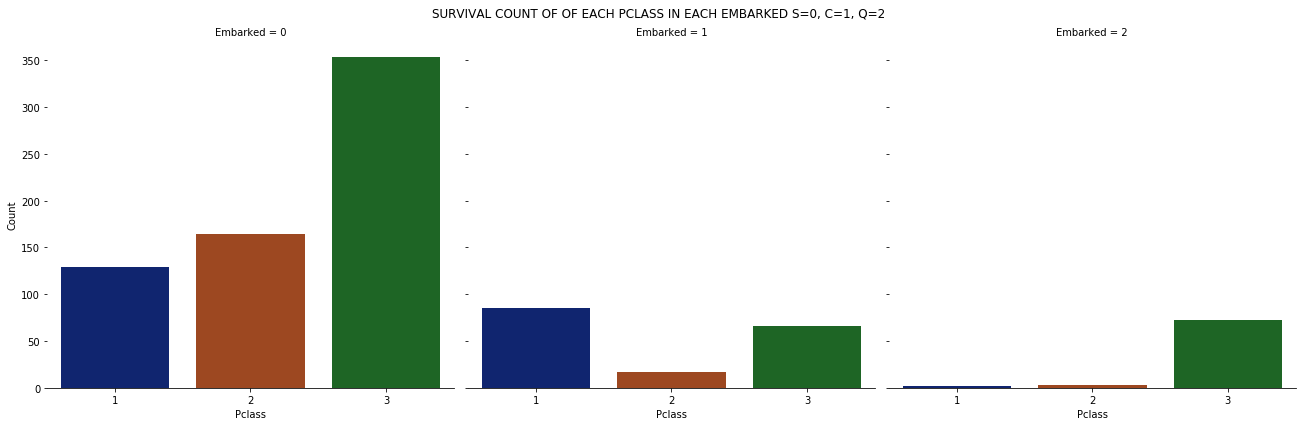

In [37]:
# Explore Pclass vs Embarked 
g = sns.catplot("Pclass", col="Embarked",  data=train_df,
                   height=6, kind="count", palette="dark")
g.despine(left=True)
g = g.set_ylabels("Count")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('SURVIVAL COUNT OF OF EACH PCLASS IN EACH EMBARKED S=0, C=1, Q=2')

##### Observations
- Passengers coming from Cherbourg (C) have more chance to survive.
- Perhaps the proportion of first class passengers is higher for those who came from Cherbourg than Queenstown (Q), Southampton (S).

### 9.5 Cabin Column <a class="anchor" id="cabin"></a>

- The data dictionary in kaggle says the cabin represents cabin number.

In [42]:
# Are there any null values?
all = len(train_df["Cabin"])
print ("Total variables for Cabin are:", all)
null_Embarked = train_df["Cabin"].isnull().sum()
print("Missing values for Cabin are:", null_Embarked)

Total variables for Cabin are: 891
Missing values for Cabin are: 687


In [43]:
# Strings not supported
#a = min(train_df["Cabin"]), max(train_df["Cabin"])
#print('Min and Max values are:', a)

b = train_df.Cabin.dtype
print('Data type is:', b)

c= train_df.Cabin.nunique()
print('Number of unique values is:', c)

d= train_df.Cabin.unique()
print('Unique values are:', d)

Data type is: object
Number of unique values is: 147
Unique values are: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17

- There are 77% of Cabin values missing. Thus I will not fill it in with a proxy and will only analyze given variables.
- The first letter of the cabin indicates the deck which indicates the probable location of the passenger in the Titanic.

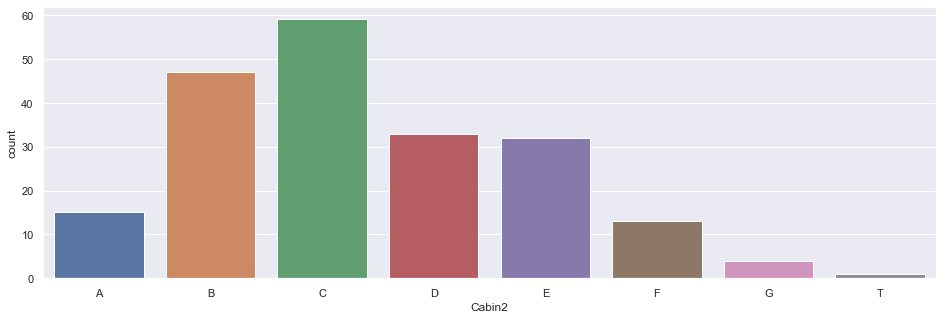

In [44]:
# Replace the Cabin number by the type of cabin 'X' if not (in case decide to use X later)
train_df["Cabin2"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train_df['Cabin'] ])
# Delete rows with value of X
cab = train_df[train_df.Cabin2 != 'X']
# chart cabin letter
sns.set(rc={'figure.figsize':(16,5)})
g = sns.countplot(cab["Cabin2"],order=['A','B','C','D','E','F','G','T'])

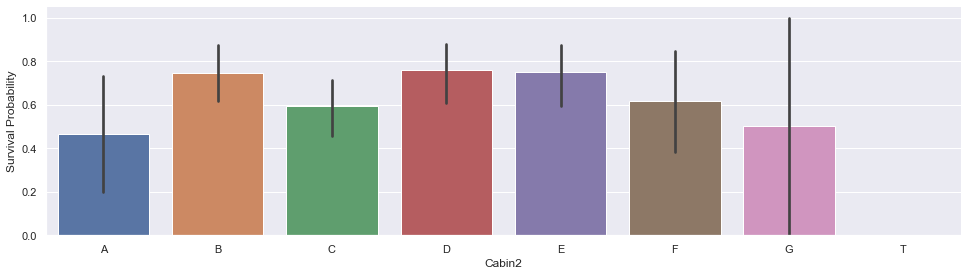

In [45]:
g = sns.catplot(y="Survived", x="Cabin2", data=cab, kind="bar", order=['A','B','C','D','E','F','G','T'], height=4, aspect=3.4)
g = g.set_ylabels("Survival Probability")
g = g.set_ylabels("Survival Probability")

Because of the low number of passenger that have a cabin, cabin is not a reliable measure to use in the model.

There is no distinct differences in the cabins so they will not be used.

### 9.6 Ticket Column <a class="anchor" id="ticket"></a>

- The data dictionary in kaggle says the ticket column represents ticket number 

In [46]:
# Are there any null values?
tick = len(train_df["Ticket"])
print ("Total variables for Ticket are:", tick)
null_Embarked = train_df["Ticket"].isnull().sum()
print("Missing values for Ticket are:", null_Embarked)

Total variables for Ticket are: 891
Missing values for Ticket are: 0


In [47]:
a = min(train_df["Ticket"]), max(train_df["Ticket"])
print('Min and Max values are:', a)

b = train_df.Ticket.dtype
print('Data type is:', b)

c= train_df.Ticket.nunique()
print('Number of unique values is:', c)

#d= train_df.Ticket.unique()
#print('Unique values are:', d)
# if too many unique then print first 5 in dataframe instead
e= train_df.filter(like='Ticket').head(n=5)
print(e)

Min and Max values are: ('110152', 'WE/P 5735')
Data type is: object
Number of unique values is: 681
             Ticket
0         A/5 21171
1          PC 17599
2  STON/O2. 3101282
3            113803
4            373450


In [48]:
## See if common occurences by extracting the ticket prefix. When there is no prefix it returns X. 
# Replace the Cabin number by the type of cabin 'X' if not
train_df["Ticket"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train_df['Ticket'] ])

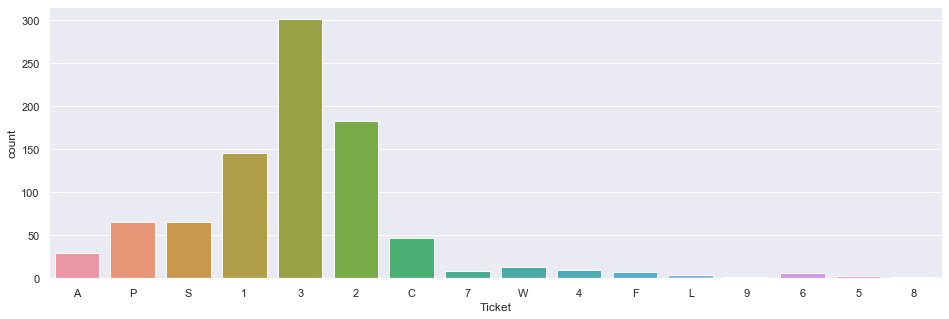

In [49]:
# Delete rows with value of X
train_df = train_df[train_df.Ticket != 'X']
# chart ticket letter
sns.set(rc={'figure.figsize':(16,5)})
g = sns.countplot(train_df["Ticket"])

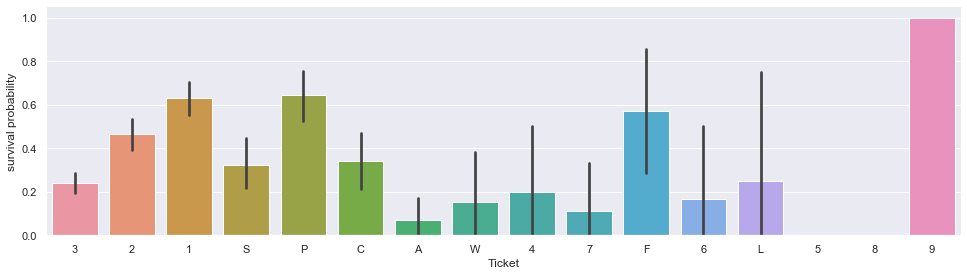

In [50]:
g = sns.catplot(x="Ticket",y="Survived",data=train_df,kind="bar", order = train_df["Ticket"].value_counts().index, height=4, aspect=3.4)
g = g.set_ylabels("survival probability")

### 9.7 Fare Column <a class="anchor" id="fare"></a>

- The data dictionary in kaggle says the fare column represents passenger fare

In [51]:
# Are there any null values?
fare = len(train_df["Fare"])
print ("Total variables for Fare are:", fare)
fare2 = train_df["Fare"].isnull().sum()
print("Missing values for Fare are:", fare2)

Total variables for Fare are: 891
Missing values for Fare are: 0


In [52]:
a = min(train_df["Fare"]), max(train_df["Fare"])
print('Min and Max values are:', a)

b = train_df.Fare.dtype
print('Data type is:', b)

c= train_df.Fare.nunique()
print('Number of unique values is:', c)

# comment out since too many unique
#d= train_df.Fare.unique()
#print('Unique values are:', d)
# if too many unique then print first 5 in dataframe instead
e= train_df.filter(like='Fare').head(n=5)
print(e)

Min and Max values are: (0.0, 512.3292)
Data type is: float64
Number of unique values is: 248
      Fare
0   7.2500
1  71.2833
2   7.9250
3  53.1000
4   8.0500


### 9.8 Parch Column <a class="anchor" id="parch"></a>

- The data dictionary in kaggle says the Parch column represents  # of parents / children aboard the Titanic

In [53]:
# Are there any null values?
par = len(train_df["Parch"])
print ("Total variables for Parch are:", par)
null_Embarked = train_df["Parch"].isnull().sum()
print("Missing values for Parch are:", null_Embarked)

Total variables for Parch are: 891
Missing values for Parch are: 0


In [54]:
a = min(train_df["Parch"]), max(train_df["Parch"])
print('Min and Max values are:', a)

b = train_df.Parch.dtype
print('Data type is:', b)

c= train_df.Parch.nunique()
print('Number of unique values is:', c)

d= train_df.Parch.unique()
print('Unique values are:', d)

Min and Max values are: (0, 6)
Data type is: int64
Number of unique values is: 7
Unique values are: [0 1 2 5 3 4 6]


### 9.9 SibSp column<a class="anchor" id="sibsp"></a>

- The data dictionary in kaggle says the SibSp column represents # of siblings / spouses aboard the Titanic

In [55]:
# Are there any null values?
sib = len(train_df["SibSp"])
print ("Total variables for SibSp are:", sib)
null_sib = train_df["SibSp"].isnull().sum()
print("Missing values for SibSp are:", null_sib)

Total variables for SibSp are: 891
Missing values for SibSp are: 0


In [56]:
a = min(train_df["SibSp"]), max(train_df["SibSp"])
print('Min and Max values are:', a)

b = train_df.SibSp.dtype
print('Data type is:', b)

c= train_df.SibSp.nunique()
print('Number of unique values is:', c)

d= train_df.SibSp.unique()
print('Unique values are:', d)

Min and Max values are: (0, 8)
Data type is: int64
Number of unique values is: 7
Unique values are: [1 0 3 4 2 5 8]


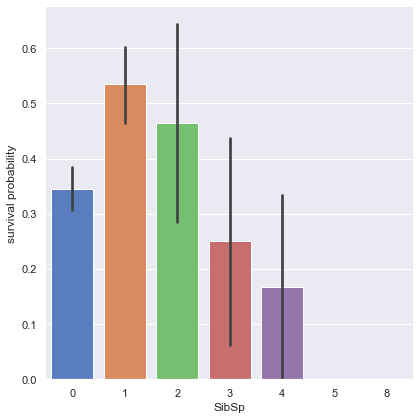

In [57]:
# Explore SibSp feature vs Survived
g = sns.catplot(x="SibSp",y="Survived",data=train_df, kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Passengers having a lot of siblings/spouses have less chance to survive, especially those with 3 or 4 siblings/ spouses. 

In [58]:
# Create a family size descriptor from SibSp and Parch
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

C:\Users\sexto\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


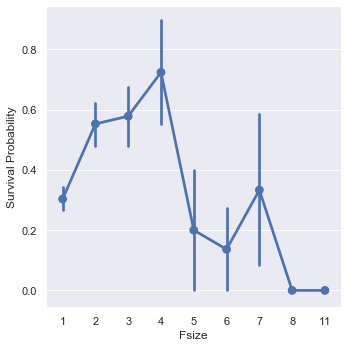

In [59]:
g = sns.factorplot(x="Fsize",y="Survived",data = train_df)
g = g.set_ylabels("Survival Probability")

The family size seems to play an important role, survival probability is worst for large families.

### 9.10 Age column <a class="anchor" id="age"></a>

- The data dictionary in kaggle says the Age column represents age in years

In [60]:
# Are there any null values?
a = len(train_df["Age"])
print ("Total variables for Age are:", a)
null_Embarked = train_df["Age"].isnull().sum()
print("Missing values for Age are:", null_Embarked)

Total variables for Age are: 891
Missing values for Age are: 177


In [83]:
a = min(train_df["Age"]), max(train_df["Age"])
print('Min and Max values are:', a)

b = train_df.Age.dtype
print('Data type is:', b)

c= train_df.Age.nunique()
print('Number of unique values is:', c)

d= train_df.Age.unique()
print('Unique values are:', sorted(d))

Min and Max values are: (0.42, 80.0)
Data type is: float64
Number of unique values is: 88
Unique values are: [0.83, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 11.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 38.0, nan, 0.42, 0.67, 0.75, 0.92, 1.0, 6.0, 9.0, 10.0, 12.0, 13.0, 14.5, 20.5, 23.5, 24.5, 30.5, 32.5, 34.5, 36.0, 36.5, 37.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0, 80.0]


In [238]:
null_Age = train_df["Age"].isnull().sum()
print("Missing values for Age are:", null_Age)

Missing values for Age are: 177


There is a significant number of missing values for the Age value or almost 20%.  It will not be used as a variable for the model. Title is a rough adequate representation.

So must find a way to fill it in with:
- median or mean
- imputation ie. predictive model to predict what value of missing value should be (can use entire dataset or just training dataset)
- find a proxy or other value that mimics value in question


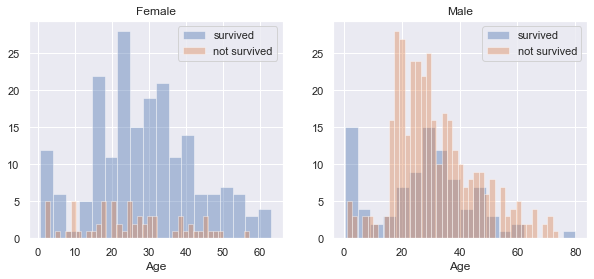

In [239]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

FIX BINS TO MATCH FEMALE VS MALE

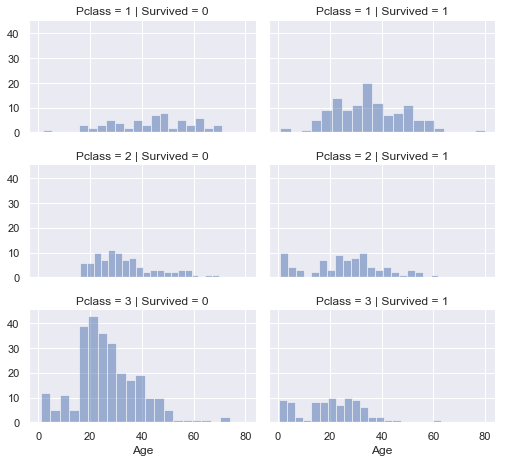

In [240]:
# Looking at Age separted by Pclass, it is significant that under age 50 9n 3rd class had low survival rate. 
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# 10. Prepare Dataframes for Modeling <a class="anchor" id="prepare"></a>

Prepare X_train, Y_train, X_test datasets. The X_train & X_test datasets must be of equal column length. The Y_train dataset must be the survived column and must be of equal row length to the X_train.

To prepare the data, look at train_df and drop unnecessary rows.

### Prepare X_train & Y_train

In [241]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title2,Cabin2,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A,7.2500,NaN,0,3,3,X,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,P,71.2833,C85,1,2,2,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,7.9250,NaN,0,1,1,X,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,53.1000,C123,0,2,2,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,3,8.0500,NaN,0,3,3,X,1


In [67]:
# In training dataset, remove rows that are :
# 1. redundant 
# 2. have shown in the Exploratory section are missing too many values & not been able to be cleaned up
# Keep: Sex, Pclass, Title2, Embarked, Parch, FSize
# Remove: Title (similar to Title2), Name (too unique), Cabin (too many values missing), Ticket (too unique),
#         Fare (too unique), SibSp (similar to Fsize), Age (too unique), PassengerId (too unique), Cabin2 (duplicate), Parch (too unique)
X_train = train_df.drop(["Title", "Name", "Cabin", "Ticket", "Fare", "SibSp", "Age", "Survived", "PassengerId", "Cabin2", "Parch"], axis=1)
Y_train = train_df["Survived"]
X_train.shape, Y_train.shape

((891, 5), (891,))

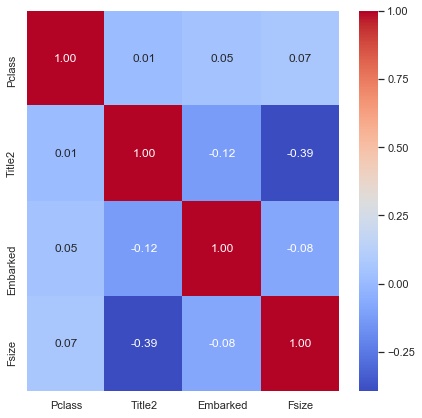

In [255]:
# Correlation matrix between variables chosen (SibSp Parch Age and Fare values) and Survived to ensure not correlated
fig, ax = plt.subplots(figsize=(7,7))
g = sns.heatmap(train_df[["Sex","Pclass", "Title2","Embarked","Fsize"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

From the heatmap, you can see that none of the features are postively correlated which is the desired result when determining variables.

#### Create categorical for all category values

In [68]:
# Create categorical values for Pclass
X_train["Pclass"] = X_train["Pclass"].astype("category")
X_train = pd.get_dummies(X_train, columns = ["Pclass"],prefix="Pc")

In [69]:
# Create categorical values for Sex
X_train["Sex"] = X_train["Sex"].astype("category")
X_train = pd.get_dummies(X_train, columns = ["Sex"],prefix="Sex")

In [70]:
# Create categorical values for Embarked
X_train["Embarked"] = X_train["Embarked"].astype("category")
X_train = pd.get_dummies(X_train, columns = ["Embarked"],prefix="Embarked")

In [71]:
# Create categorical values for Title2
X_train["Title2"] = X_train["Title2"].astype("category")
X_train = pd.get_dummies(X_train, columns = ["Title2"],prefix="Title")

In [173]:
X_train.head(n=2)

,Fsize,Pc_1,Pc_2,Pc_3,Sex_female,Sex_male,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3
0,2,0,0,1,0,1,1,0,0,0,0,0,1
1,2,1,0,0,1,0,0,1,0,0,0,1,0


### Prepare X_test

In [119]:
# Prepare test dataset by performing necessary data manipulation on columns and adding columns to ensure matches X_train
# Determine what needs to be done by examining the test_df
X_test = test_df
X_test.head(n=2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


- Will be keeping Pclass, Sex, Embarked, Parch columns
- Will create Title column from Name column
- Will create Fsize column from SibSp column

In [120]:
X_test = X_test.drop(["PassengerId", "Age", "Ticket", "Fare", "Cabin"], axis=1)

In [121]:
# Ensure no missing values for Pclass, Sex, Embarked, Name, SibSp, Parch
null_Pclass = X_test["Pclass"].isnull().sum()
print("Missing values for Pclass are:", null_Pclass)

null_Sex = X_test["Sex"].isnull().sum()
print("Missing values for Sex are:", null_Sex)

null_Embarked = X_test["Embarked"].isnull().sum()
print("Missing values for Embarked are:", null_Embarked)

null_Name = X_test["Name"].isnull().sum()
print("Missing values for Title are:", null_Name)

null_SibSp = X_test["SibSp"].isnull().sum()
print("Missing values for SibSp are:", null_SibSp)

null_Parch = X_test["Parch"].isnull().sum()
print("Missing values for Parch are:", null_Parch)

Missing values for Pclass are: 0
Missing values for Sex are: 0
Missing values for Embarked are: 0
Missing values for Title are: 0
Missing values for SibSp are: 0
Missing values for Parch are: 0


#### Create Title column from Name column

In [122]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in test_df["Name"]]
X_test["Title"] = pd.Series(dataset_title)
X_test["Title"].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [123]:
# Ensure no unique title in test_df that were not in train_df
c= X_test.Title.nunique()
print('Number of unique values is:', c)

d= X_test.Title.unique()
print('Unique values are:', d)

Number of unique values is: 9
Unique values are: ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [124]:
# Convert Titles to main categories
# Add Dona to Mrs
# From wiki: Dona may refer to: Feminine form for don (honorific) a Spanish, Portuguese
# Convert to categorical values Title
X_test["Title"] = X_test["Title"].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Mr')
X_test["Title"] = X_test["Title"].replace(['Lady', 'the Countess','Countess', 'Dona'], 'Mrs')
X_test["Title"] = X_test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":2, "Mlle":2, "Mrs":2, "Mr":3})
X_test["Title"] = X_test["Title"].astype(int)

#### Create Fsize column from SibSp column

In [125]:
# Create a family size descriptor from SibSp and Parch
X_test["Fsize"] = X_test["SibSp"] + X_test["Parch"] + 1

#### Drop unnecessary columns

In [127]:
X_test = X_test.drop(["Name", "SibSp", "Parch"], axis=1)

In [129]:
# Create categorical values for Pclass
X_test["Pclass"] = X_test["Pclass"].astype("category")
X_test = pd.get_dummies(X_test, columns = ["Pclass"],prefix="Pc")

In [130]:
# Create categorical values for Sex
X_test["Sex"] = X_test["Sex"].astype("category")
X_test = pd.get_dummies(X_test, columns = ["Sex"],prefix="Sex")

In [131]:
# Create categorical values for Embarked
X_test["Embarked"] = X_test["Embarked"].astype("category")
X_test = pd.get_dummies(X_test, columns = ["Embarked"],prefix="Embarked")

In [132]:
# Create categorical values for Title
X_test["Title"] = X_test["Title"].astype("category")
X_test = pd.get_dummies(X_test, columns = ["Title"],prefix="Title")

The decision trees implemented in scitkit-learn uses only numerical features and these features are interpretered always as continous numeric variables. Code the categeroical feature into multiple binary features with 1 when the category matches and 0 otherwise. This is called one-hot-encoding.

In [133]:
X_test.head(n=2)

,Fsize,Pc_1,Pc_2,Pc_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_0,Title_1,Title_2,Title_3
0,1,0,0,1,0,1,0,1,0,0,0,0,1
1,2,0,0,1,1,0,0,0,1,0,0,1,0


# 11. Modeling <a class="anchor" id="model"></a>

In [103]:
# Suppress future warnings from sci-kit learn package
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Random Forest
- KNN or k-Nearest Neighbors
- Logistic Regression
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest)

In [155]:
# Random Forest
# set random seed for reproducibility
import random
random.seed(1234)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_predRF = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.62

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [156]:
# K-nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_predKNN = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.05

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression)

In [157]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_predLR = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.49

Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)

In [158]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_predSVC = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.39

In machine learning, Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

In [159]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_predGNB = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.36

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron)

In [160]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_predPer = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.9

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [161]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_predLSVC = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\sexto\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


83.61

Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate. Reference 
[Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

In [162]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_predSGD = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.73

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree)

In [163]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_predDT = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.62

Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [164]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.62
8,Decision Tree,84.62
7,Linear SVC,83.61
0,Support Vector Machines,83.39
1,KNN,83.05
2,Logistic Regression,82.49
4,Naive Bayes,80.36
5,Perceptron,78.90
6,Stochastic Gradient Decent,72.73


#### Submission

I chose RandomForest to submit.

In [166]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_predRF
    })
submission.to_csv('submission.csv', index=False)

- Our submission to the competition site Kaggle results in scoring 13,457 of 22,334 competition entries.
- Any suggestions to improve our score are most welcome.

#### References
This notebook has been created based on great work done solving the Titanic competition and other sources.

- [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [Titanic Top 4% with ensemble modeling](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling)